In [2]:
import numpy as np
from  XMLPARSER import XMLParser
from sklearn.svm import LinearSVC
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [3]:
x=XMLParser("data").parse()

In [4]:
df = pd.read_csv('train.csv',delimiter=",")
Y=np.asarray(df[df.columns[-1]])

In [5]:
tfidf=TfidfVectorizer()
tfidf.fit(x)
X=tfidf.transform(x).toarray()

In [6]:
X.shape

(4800, 13113)

In [7]:
clf = LinearSVC()
clf.fit(X,Y)
print(clf.score(X,Y))

0.9110416666666666


In [8]:
xx=XMLParser("test_set").parse()
XX=tfidf.transform(xx).toarray()

In [9]:
print(clf.predict(XX))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
print(clf.score(X,Y))

0.9110416666666666


In [11]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
components=pca.transform(X)
z=components

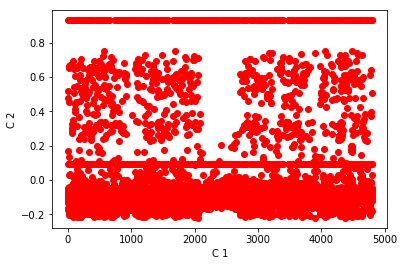

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(components,'ro')
plt.ylabel('C 2') 
plt.xlabel('C 1') 

plt.show()

In [16]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.cluster_centers_

array([[ 6.16368077e-04,  5.78558592e-04,  7.58217550e-05, ...,
         1.14841526e-04,  1.73138079e-05,  2.03182912e-04],
       [ 4.44522891e-18,  3.03576608e-18,  2.03287907e-19, ...,
        -4.20128342e-19, -4.40457133e-20, -1.59919820e-18]])

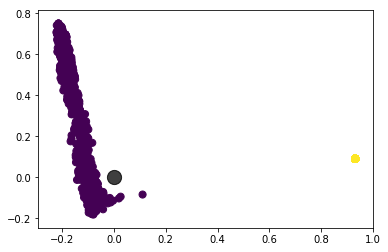

In [22]:
plt.scatter(z[:, 0], z[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);